# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [2]:
m = np.array([[.5,.5], 
              [-1, 1]])
df['média'], df['diferença'] = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())
(df.style.format(precision=2, decimal=',').bar(subset='diferença', color=['orange', 'lightblue'], align='zero'))

,p1,p2,média,diferença
0,"6,96","7,94","7,45","0,98"
1,"2,86","5,10","3,98","2,24"
2,"2,27","0,97","1,62","-1,29"
3,"5,51","4,47","4,99","-1,04"
4,"7,19","8,94","8,07","1,74"
5,"4,23","3,43","3,83","-0,80"
6,"9,81","9,84","9,82","0,03"
7,"6,85","7,92","7,38","1,07"
8,"4,81","5,70","5,25","0,89"
9,"3,92","5,68","4,80","1,75"


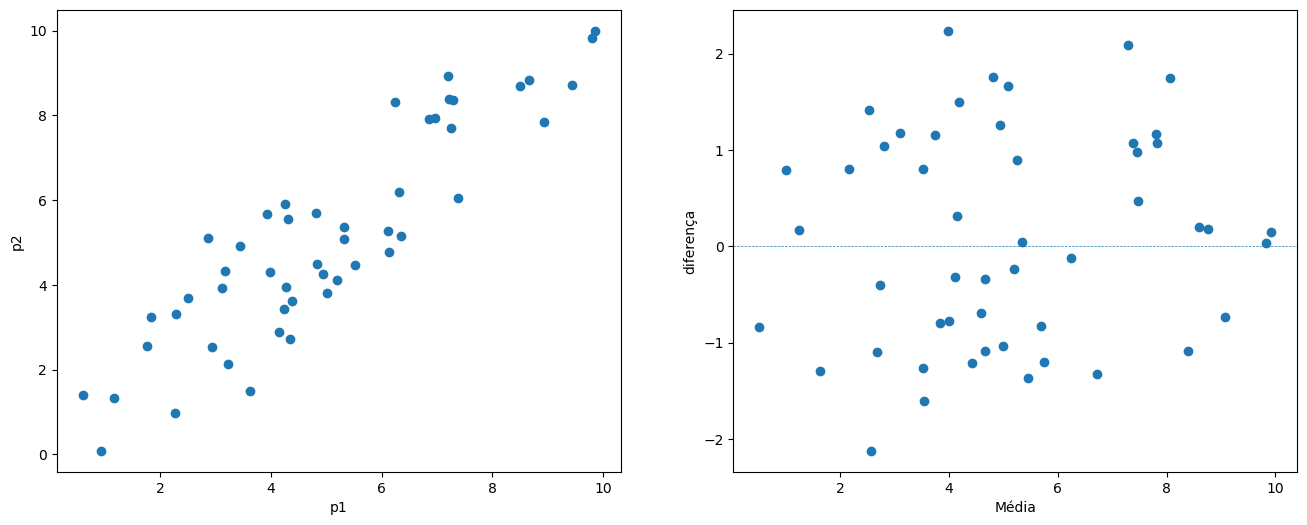

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

scatter_1 = ax[0].scatter(x=df.p1, y=df.p2)
ax[0].set_xlabel('p1')
ax[0].set_ylabel('p2')

scatter_2 = ax[1].scatter(x=df['média'], y=df['diferença'])
ax[1].axhline(y=0, linewidth=0.5, linestyle='--')
ax[1].set_xlabel('Média')
ax[1].set_ylabel('diferença')

plt.show()

In [4]:
print('Correlação entre p1 e p2: ', df.p1.corr(df.p2))

Correlação entre p1 e p2:  0.8957365818728046


In [5]:
print('Correlação entre média e diferença: ', df['média'].corr(df['diferença']))

Correlação entre média e diferença:  0.13347385411788837


#### Correlação entre os dados das variáveis p1 e p2:

- A correlação de 0,89 demonstra uma forte correlação positiva entre as amostras das colunas p1 e p2. Isso significa que essas variáveis têm uma relação positiva, indicando uma forte associação e semelhança entre os dois conjuntos de dados.
#### Correlação entre os dados transformados (média e diferença):

- O valor resultante de -0,13 indica uma correlação negativa relativamente baixa entre as variáveis transformadas. Isso significa que há uma relação inversa, ou seja, à medida que uma variável aumenta, a outra tende a diminuir, e vice-versa. No entanto, o valor próximo de zero (-0,13) indica uma correlação inversa fraca. Essa relação inversa pode não ser tão significativa ou previsível.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [6]:
df['soma'] = df.p1 + df.p2
(df.style.format(precision=2, decimal=','))

,p1,p2,média,diferença,soma
0,"6,96","7,94","7,45","0,98","14,91"
1,"2,86","5,10","3,98","2,24","7,96"
2,"2,27","0,97","1,62","-1,29","3,24"
3,"5,51","4,47","4,99","-1,04","9,99"
4,"7,19","8,94","8,07","1,74","16,13"
5,"4,23","3,43","3,83","-0,80","7,66"
6,"9,81","9,84","9,82","0,03","19,64"
7,"6,85","7,92","7,38","1,07","14,77"
8,"4,81","5,70","5,25","0,89","10,51"
9,"3,92","5,68","4,80","1,75","9,60"


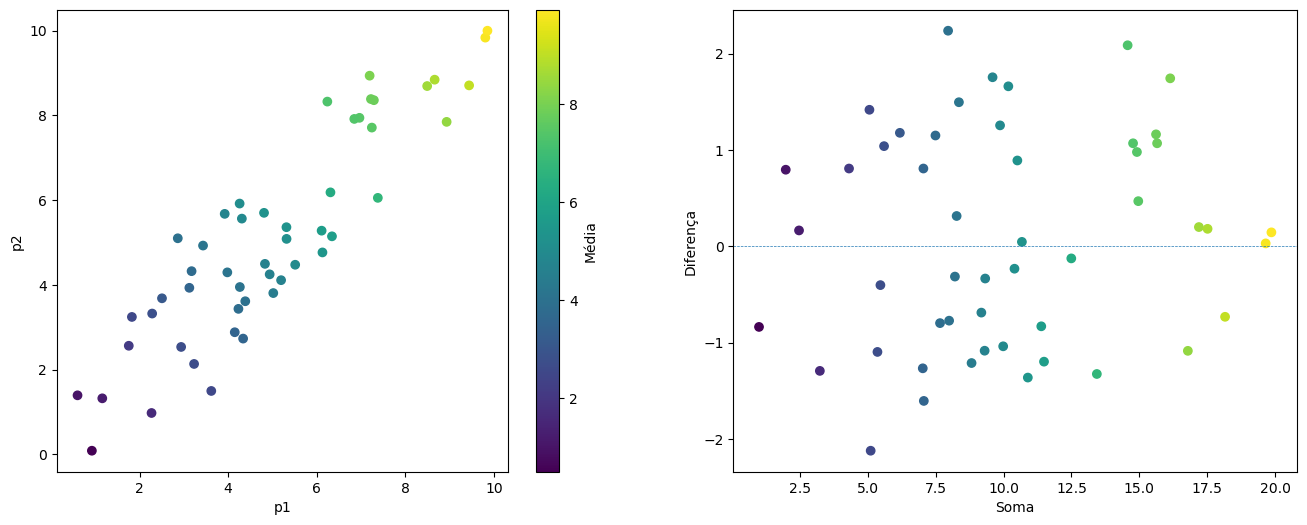

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

scatter_1 = ax[0].scatter(x=df.p1, y=df.p2, c=df['média'])
ax[0].set_xlabel('p1')
ax[0].set_ylabel('p2')

cbar = fig.colorbar(scatter_1, ax=ax[0])
cbar.set_label('Média')

scatter_2 = ax[1].scatter(x=df['soma'], y=df['diferença'], c=df['média'])
ax[1].axhline(y=0, linewidth=0.5, linestyle='--')
ax[1].set_xlabel('Soma')
ax[1].set_ylabel('Diferença')

plt.show()

Ao analisar o primeiro gráfico, podemos observar uma distribuição proporcional entre todos os valores de 0 a 10 tanto na variável p1 quanto na variável p2. Isso significa que a distribuição dos pontos é equilibrada e não há concentração em uma faixa específica. Consequentemente, a média resultante também apresenta uma distribuição semelhante, refletindo as proporções das variáveis p1 e p2.

Após a transformação dos dados para gerar a soma e a diferença, podemos perceber que a variação também é proporcional tanto no aumento quanto na diminuição dos valores de p1 em relação a p2 em todos os dados. Isso sugere que as operações de soma e diferença preservam a proporção entre os valores das variáveis, mantendo a relação entre elas.

Essas observações indicam que as relações entre p1 e p2, tanto na distribuição original quanto nas operações de soma e diferença, possuem uma característica de proporcionalidade e mantêm as proporções entre os valores, o que pode ser importante para a análise e interpretação dos dados. Além disso, podemos concluir que a soma das duas variáveis nada mais é do que o dobro da média, e que a média, por sua vez, é a metade da soma das duas variáveis. Essa relação adicional entre a soma, a média e as variáveis p1 e p2 reforça ainda mais a importância da proporção na análise dos dados.